In [5]:
from google.colab  import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
import pandas as pd 
import numpy as np
 

In [6]:
df=pd.read_csv("/content/drive/MyDrive/raj/weight-height.csv")
df


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [7]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [9]:
df.shape

(10000, 3)

In [10]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [12]:
df.nunique()

Gender        2
Height    10000
Weight    10000
dtype: int64

In [13]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [14]:
df.isnull().sum().sum()

0

In [15]:
df['Gender'].replace({'Female':0,'Male':1},inplace =True)
  

In [16]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [17]:
df.tail()

,Gender,Height,Weight
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461
9999,0,61.944246,113.649103


In [18]:
df['Gender']=df['Gender'].astype('category') #for coverting object to category
df.dtypes

Gender    category
Height     float64
Weight     float64
dtype: object

In [19]:
df.drop_duplicates(keep='first',inplace=True) 
df.shape

(10000, 3)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[["Height","Weight"]],df['Gender'],test_size=0.3,random_state=22)


In [21]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(X_train,y_train)

LogisticRegression()

In [22]:
l1.coef_ #coeffients of height and weight

array([[-0.48444603,  0.19907479]])

In [23]:
l1.intercept_

array([-0.01011779])

In [24]:
66.389779*(-1)*0.48444603+165.499807*0.19907479-0.01011779

0.7744566644381574

In [25]:
X_train

,Height,Weight
1261,66.389779,165.499807
4448,72.717613,210.365362
2390,69.558052,181.321297
1622,69.983137,206.414412
438,68.529408,169.544805
...,...,...
4587,67.455246,192.835593
6646,68.225407,162.924772
5478,60.918025,119.772634
8548,62.214923,132.555193


In [26]:
#in linear regression is -infinity to +infinity
#but the ptobability is lies between 0 to 1
#to convert the infinity values to the 0 to 1 we need logit function

In [27]:
np.exp(-0.7744566644381574)/1+np.exp(-0.7744566644381574)
#1/(1+e^(-y))-->e^(y)/1+e^(y)

0.9219083315239421

In [28]:
trainpreds=l1.predict(X_train)
testpreds=l1.predict(X_test)

In [29]:
print(trainpreds[0:5])
print(y_train[0:5])

[1 1 1 1 1]
1261    1
4448    1
2390    1
1622    1
438     1
Name: Gender, dtype: category
Categories (2, int64): [0, 1]


In [30]:
print(testpreds[0:5])
print(y_test[0:5])

[1 0 0 0 0]
2077    1
9207    0
6755    0
6704    0
9528    0
Name: Gender, dtype: category
Categories (2, int64): [0, 1]


In [31]:
from sklearn.metrics import  confusion_matrix,accuracy_score,recall_score,precision_score
print(confusion_matrix (y_train,trainpreds))   # accurate the predict 
print(confusion_matrix (y_test,testpreds))
print("train accuarcy:",accuracy_score(y_train,trainpreds))
print("test accuarcy:",accuracy_score(y_test,testpreds))
print("train recall:",recall_score(y_train,trainpreds))
print("test recall:",recall_score(y_test,testpreds))
print("train precision:",precision_score(y_train,trainpreds))
print("test precision:",precision_score(y_test,testpreds))
#here we predicting the 3262 females out of which 277 showing are males i.e 277 members are showing as male
#similarlly we are for 3186 males ,275 females wrongly predicted.

[[3262  277]
 [ 275 3186]]
[[1336  125]
 [ 135 1404]]
train accuarcy: 0.9211428571428572
test accuarcy: 0.9133333333333333
train recall: 0.9205431956082057
test recall: 0.9122807017543859
train precision: 0.9200115506786024
test precision: 0.9182472204054938


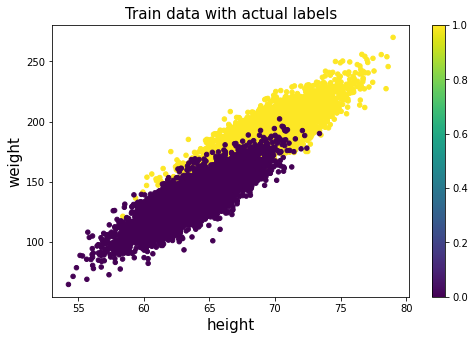

In [32]:
from matplotlib import pyplot as plt
def plotdata(x,y,label):
    plt.scatter(x,y,c=label,s=20)
    plt.xlabel("height",fontsize=15)
    plt.ylabel("weight",fontsize=15)
    cbar=plt.colorbar()
    plt.show(True)
plt.figure(figsize=(8,5))
plt.title("Train data with actual labels",fontsize=15)
plotdata(df["Height"],df['Weight'],df['Gender'])
plt.show(True)    



In [33]:
preds=l1.predict(df[["Height","Weight"]])

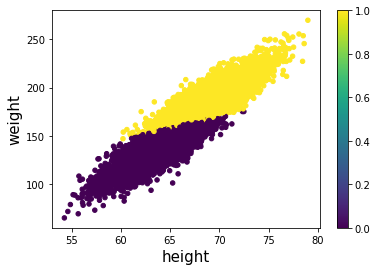

In [34]:
plotdata(df["Height"],df['Weight'],preds)
plt.show(True)    


In [35]:
l1.predict_proba(X_train)

array([[0.31551601, 0.68448399],
       [0.00130459, 0.99869541],
       [0.08399548, 0.91600452],
       ...,
       [0.99659093, 0.00340907],
       [0.97727925, 0.02272075],
       [0.97814619, 0.02185381]])